In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('./Data/sam.funny_cleaning.csv')

### Bài đăng có lượng tương tác lớn nhất

In [3]:
df = data_df
df.loc[df['reaction_count'].idxmax()]

index                                                                72
post_id                                                 665207308976150
text                  Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
post_text             Tỉnh 3 ngày chưa xỉu.\n\n#Tanjiro #Inosuke #Ze...
time                                                2023-08-01 21:16:26
timestamp                                                    1690899386
comments                                                           3658
shares                                                             1137
username                                                   Gia đình Ngộ
comments_full         [{'comment_id': '692275942716576', 'comment_ur...
reactors              [{'name': 'Uyên Thảo Vũ', 'link': 'https://fac...
reactions             {'thích': 23339, 'yêu thích': 349, 'haha': 792...
reaction_count                                                   104862
hour_minute_second                                             2

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               192 non-null    int64 
 1   post_id             192 non-null    int64 
 2   text                192 non-null    object
 3   post_text           192 non-null    object
 4   time                192 non-null    object
 5   timestamp           192 non-null    int64 
 6   comments            192 non-null    int64 
 7   shares              192 non-null    int64 
 8   username            192 non-null    object
 9   comments_full       192 non-null    object
 10  reactors            192 non-null    object
 11  reactions           192 non-null    object
 12  reaction_count      192 non-null    int64 
 13  hour_minute_second  192 non-null    object
 14  hour                192 non-null    int64 
 15  d-m-y               192 non-null    object
dtypes: int64(7), object(9)
mem

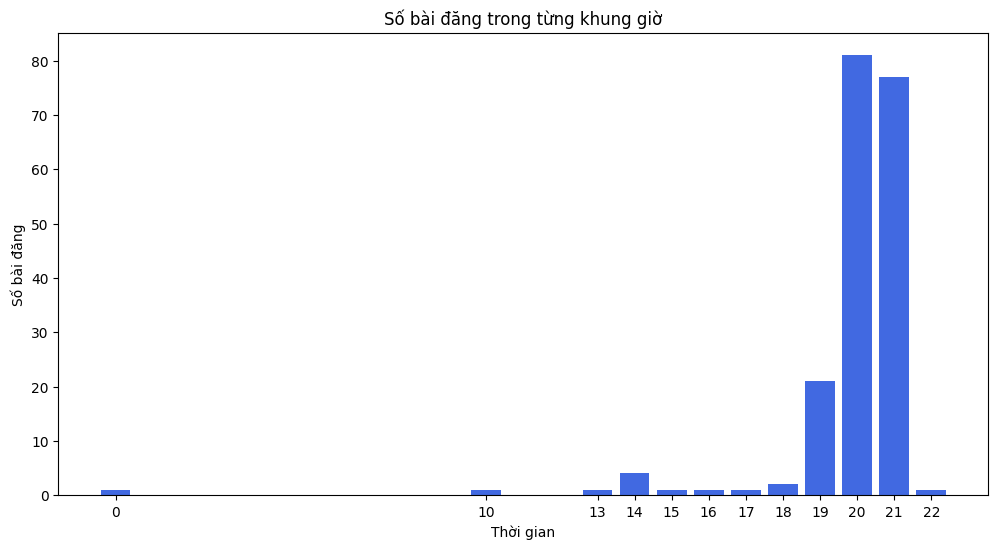

In [5]:
a = df["hour"].value_counts().sort_index()
plt.subplots(figsize=(12, 6))
plt.bar(a.index, a.values,color = 'royalblue')
plt.xticks(a.index)
plt.title("Số bài đăng trong từng khung giờ")
plt.xlabel("Thời gian")
plt.ylabel("Số bài đăng")
plt.show()

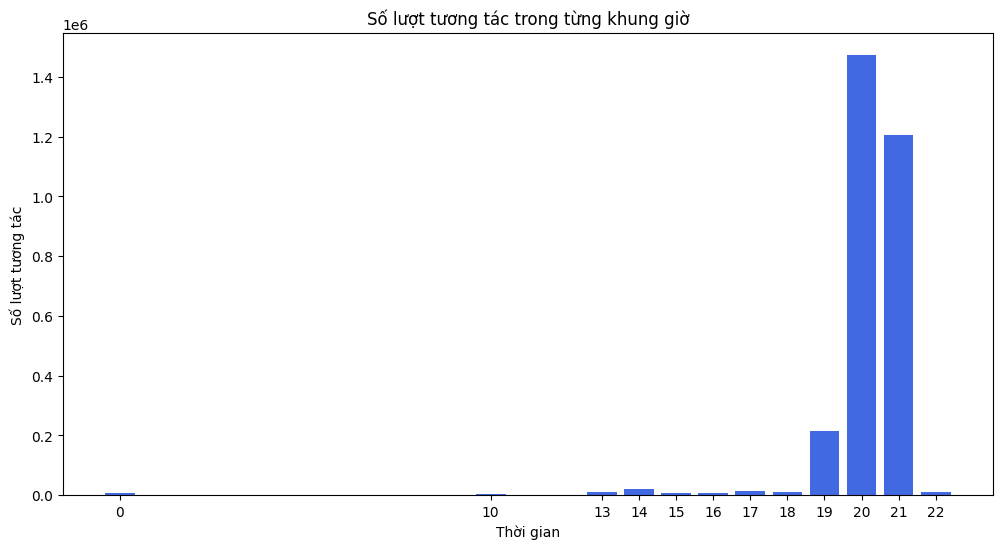

In [6]:
b = df.groupby('hour')['reaction_count'].sum()
plt.subplots(figsize=(12, 6))
plt.bar(b.index, b.values,color = 'royalblue')
plt.xticks(b.index)
plt.title("Số lượt tương tác trong từng khung giờ")
plt.xlabel("Thời gian")
plt.ylabel("Số lượt tương tác")
plt.show()

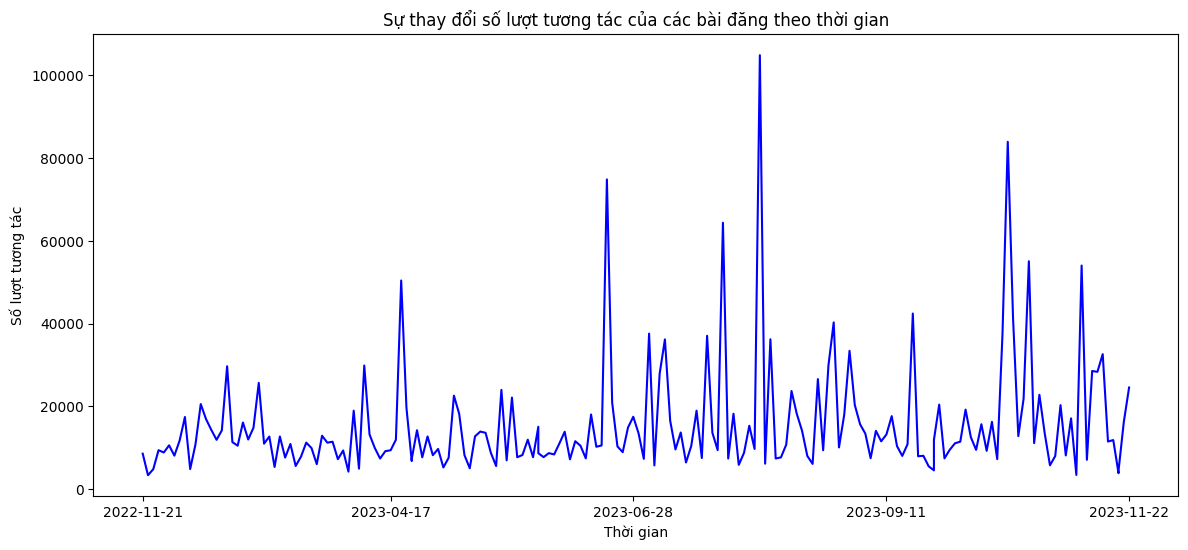

In [7]:
selected_ticks = [df['d-m-y'].iloc[0], df['d-m-y'].iloc[48], df['d-m-y'].iloc[96], df['d-m-y'].iloc[144], df['d-m-y'].iloc[-1]]
x = df['d-m-y'].to_list()
x.reverse()
y = df['reaction_count'].to_list()
y.reverse()
plt.subplots(figsize=(14, 6))
plt.plot(x, y, color = 'blue')
plt.xticks(selected_ticks)
plt.title("Sự thay đổi số lượt tương tác của các bài đăng theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Số lượt tương tác")
plt.show()

In [8]:
reaction = []
for i in range(0, 192):
   first_row = df.iloc[i]
   r = dict(eval(first_row['reactions']))
   r["shares"] = first_row['shares']
   r["comments"] = first_row['comments']
   reaction.append(r)
   
reactions = pd.DataFrame(reaction)
reactions = reactions.fillna(0)
reactions["hour"] = df['hour']
reactions["reaction_count"] = df['reaction_count']
reactions.loc[192] = pd.Series(reactions.sum())
reactions

,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ,shares,comments,hour,reaction_count
0,8675.0,101.0,15693.0,21.0,39.0,59.0,1.0,194.0,454.0,20.0,24589.0
1,6739.0,55.0,9396.0,15.0,15.0,37.0,1.0,44.0,378.0,21.0,16258.0
2,1964.0,16.0,2510.0,7.0,6.0,9.0,0.0,15.0,104.0,20.0,4512.0
3,1879.0,26.0,1970.0,5.0,4.0,1.0,0.0,34.0,66.0,10.0,3885.0
4,5000.0,44.0,6808.0,12.0,12.0,14.0,0.0,34.0,170.0,19.0,11890.0
...,...,...,...,...,...,...,...,...,...,...,...
188,4433.0,119.0,4833.0,10.0,31.0,17.0,0.0,19.0,190.0,13.0,9443.0
189,3381.0,402.0,1031.0,9.0,31.0,4.0,0.0,7.0,43.0,14.0,4858.0
190,2487.0,58.0,815.0,17.0,6.0,14.0,0.0,8.0,64.0,14.0,3397.0
191,5950.0,735.0,22.0,17.0,99.0,1778.0,0.0,37.0,156.0,16.0,8601.0


Text(0.5, 1.0, 'Dự đoán xu hướng tướng tác của page')

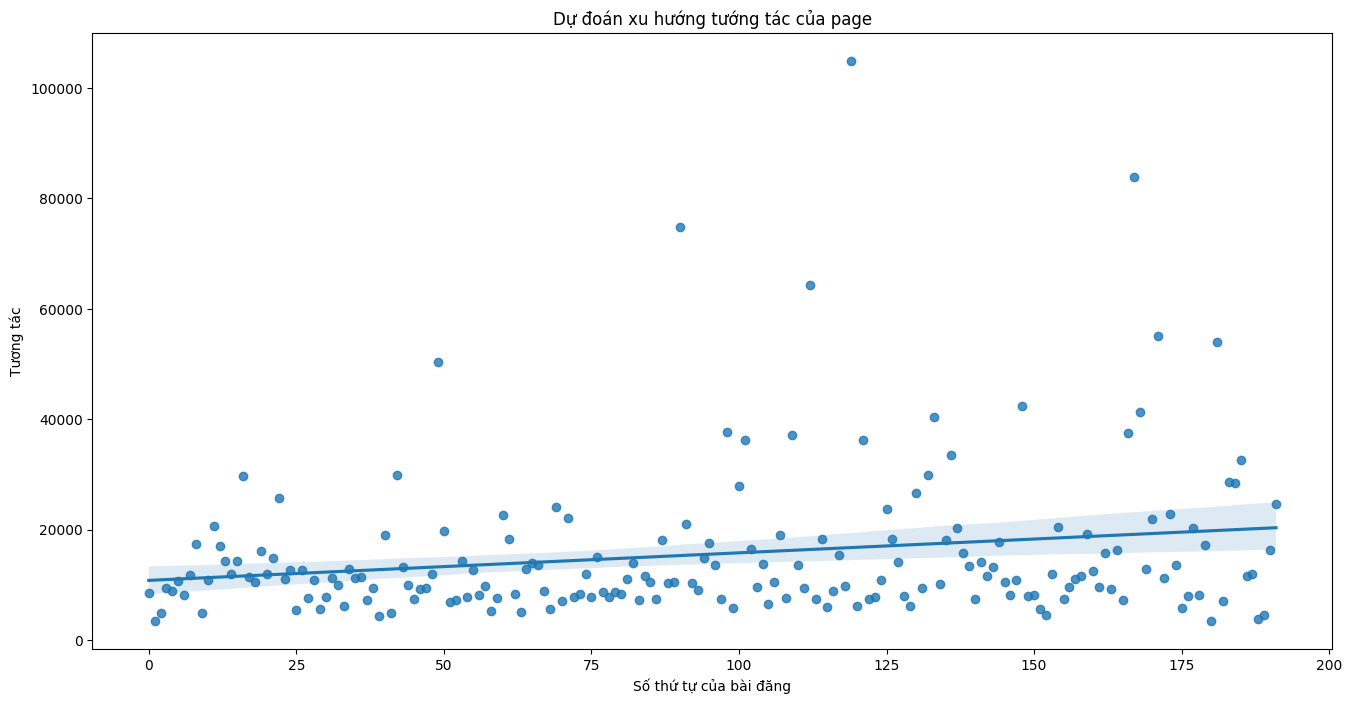

In [9]:
df_data = pd.DataFrame()
df_data["Số thứ tự của bài đăng"] = df.index
df_data["Tương tác"] = y

fig, ax = plt.subplots(figsize = (16, 8))
sns.regplot(x = "Số thứ tự của bài đăng", y = "Tương tác", data = df_data, ax = ax)
ax.set_title("Dự đoán xu hướng tướng tác của page")


Text(0.5, 1.0, 'Số lượng của từng loại tương tác')

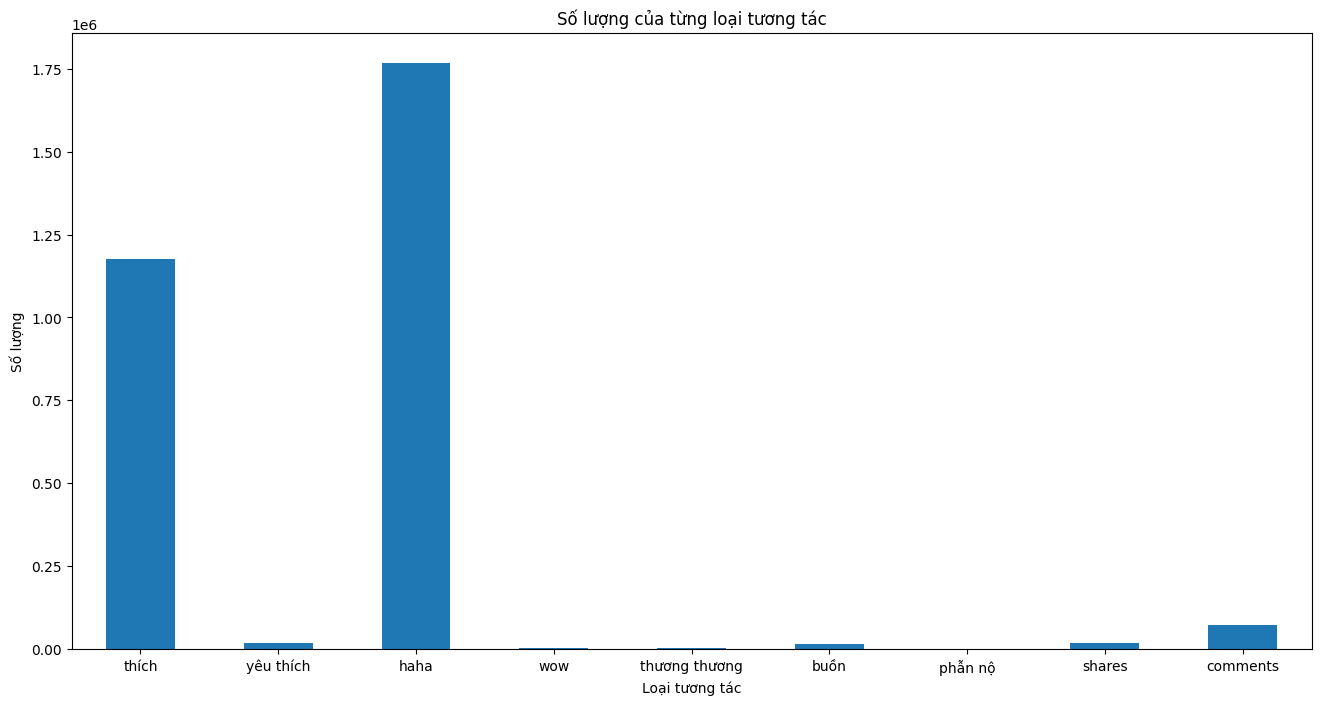

In [10]:
c = reactions[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']]
c.iloc[192].plot(kind='bar', figsize=(16, 8))
plt.xticks(rotation = 0)
plt.xlabel('Loại tương tác')
plt.ylabel('Số lượng')
plt.title('Số lượng của từng loại tương tác')

In [11]:
d = reactions.iloc[192]
(d['thích'] + d['haha']) / (d['reaction_count'] + d['shares'] + d['comments']) * 100

95.58588542552322

In [12]:
reactions = reactions.drop(192)

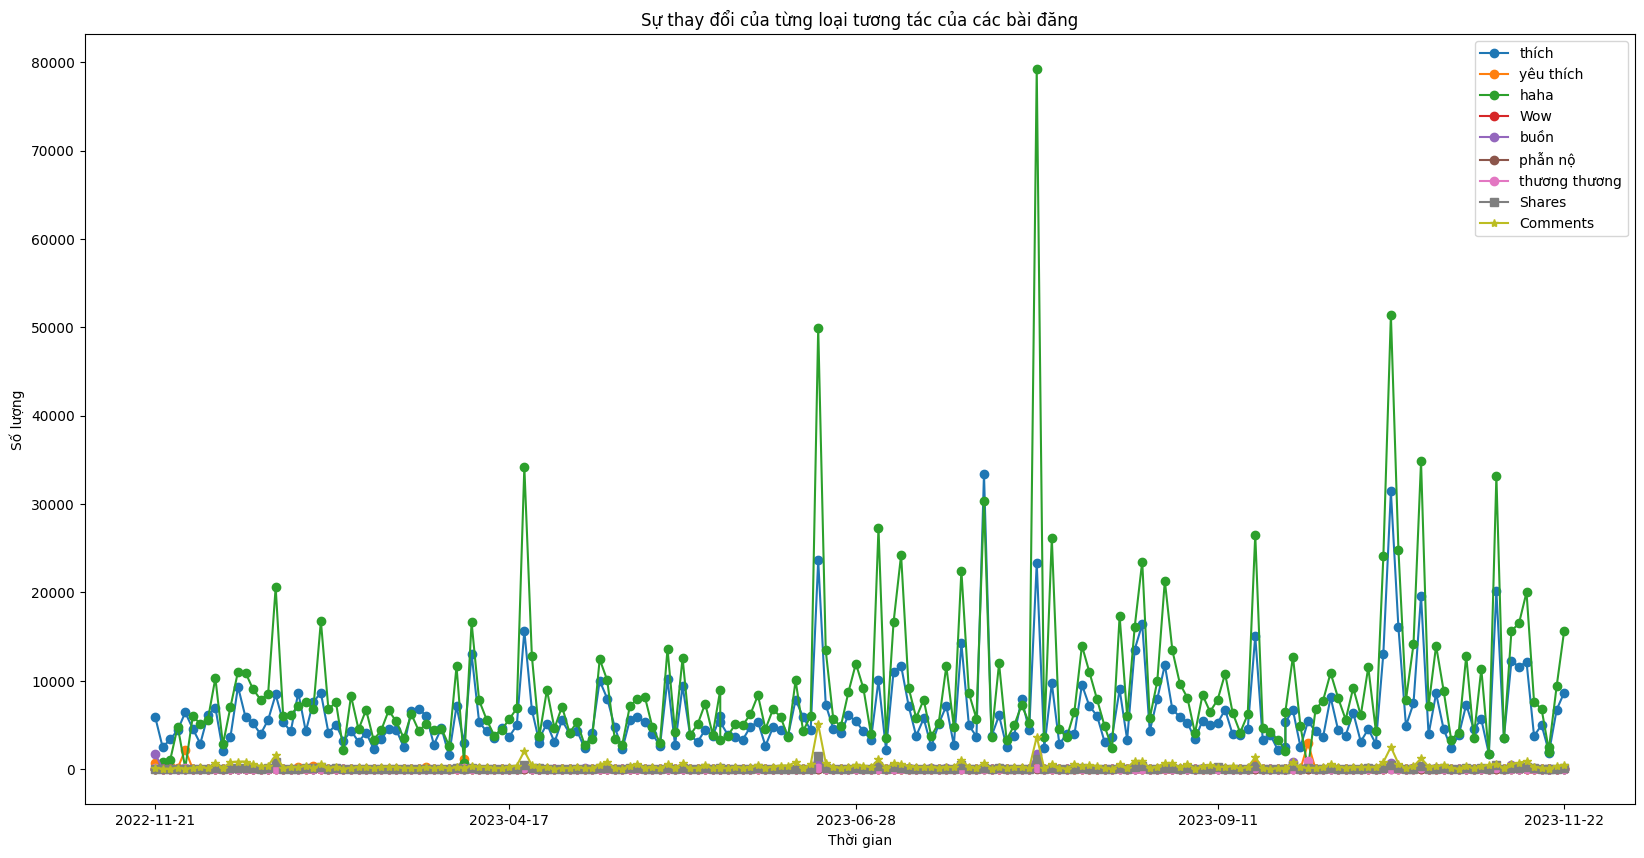

In [13]:
x = df['d-m-y'].to_list()
x.reverse()
y1 = reactions['thích'].to_list(); y1.reverse()
y2 = reactions['yêu thích'].to_list(); y2.reverse()
y3 = reactions['haha'].to_list(); y3.reverse()
y4 = reactions['wow'].to_list(); y4.reverse()
y5 = reactions['buồn'].to_list(); y5.reverse()
y6 = reactions['phẫn nộ'].to_list(); y6.reverse()
y7 = reactions['thương thương'].to_list(); y7.reverse()
y8 = reactions['shares'].to_list(); y8.reverse()
y9 = reactions['comments'].to_list(); y9.reverse()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y1, label = "thích", marker="o")
ax.plot(x, y2, label = "yêu thích", marker="o")
ax.plot(x, y3, label = "haha", marker="o")
ax.plot(x, y4, label = "Wow", marker="o")
ax.plot(x, y5, label = "buồn", marker="o")
ax.plot(x, y6, label = "phẫn nộ", marker="o")
ax.plot(x, y7, label = "thương thương", marker="o")
ax.plot(x, y8, label = "Shares", marker="s")
ax.plot(x, y9, label = "Comments", marker="*")
ax.set_xticks(selected_ticks)
plt.title("Sự thay đổi của từng loại tương tác của các bài đăng")
plt.xlabel("Thời gian")
plt.ylabel("Số lượng")
plt.legend()

### Độ tương quan giữa các loại cảm xúc với comment

In [14]:
print(reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(reactions['comments']))

thích            0.721749
yêu thích        0.068288
haha             0.859682
wow              0.782405
buồn             0.618401
phẫn nộ          0.372218
thương thương    0.177080
dtype: float64
